# Twitch Top Streamers Data- EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
td = pd.read_csv('twitchdata.csv') # creating a dataframe of csv data

In [3]:
td.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


## Description
* This data consists of different things like number of viewers, number of active viewers, followers gained and many other relevant columns regarding a particular streamer. It has 11 different columns with all the necessary information that is needed.

* This dataset has 1000 rows and 11 columns, requuirement was 30 rows and 8 columns with atleast 5 numerical columns.

In [4]:
td.info() # gives information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
td.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


In [6]:
td.isnull().sum() # Finding is there any missing values in the data

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

## Observation: 
* There are no missing values in the dataset. 

In [7]:
type(td)

pandas.core.frame.DataFrame

In [8]:
td.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [9]:
td.shape

(1000, 11)

In [10]:
# twitch Top 100 streamer with respect to followers
td_top_100 = td.sort_values('Followers', ascending = False).head(100)
td_top_100.head() # top 5 streamers 

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English
35,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English


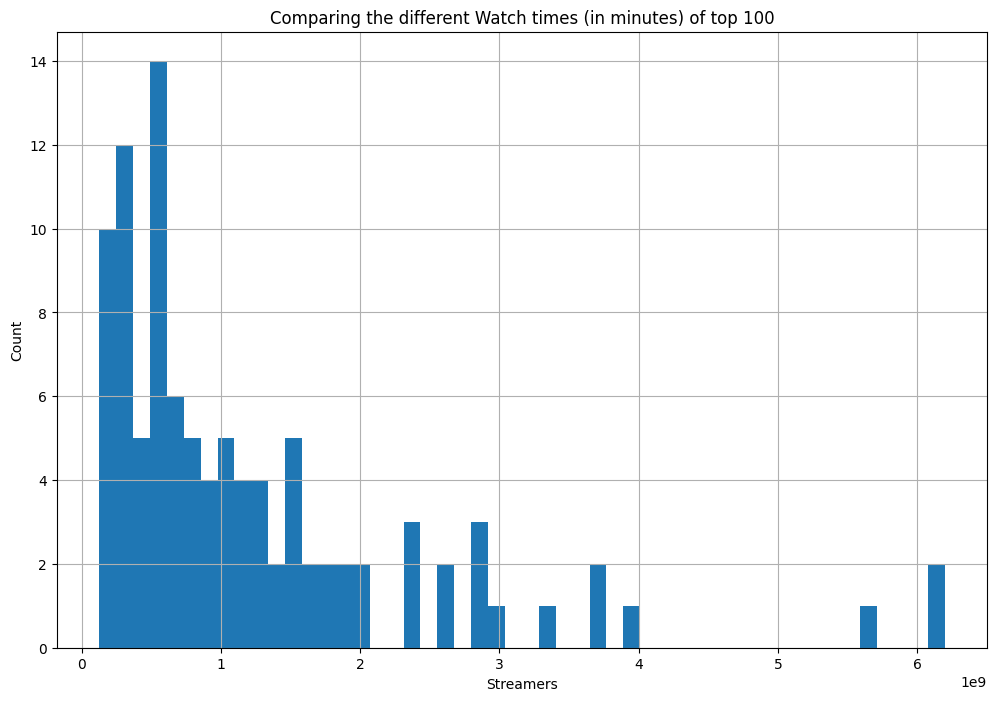

In [11]:
# This is dataframe of top 100 streamers with respect to the followers, and its histogram.

plt.figure(figsize = (12,8))
td_top_100['Watch time(Minutes)'].hist(bins=50)
plt.title('Comparing the different Watch times (in minutes) of top 100')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show()

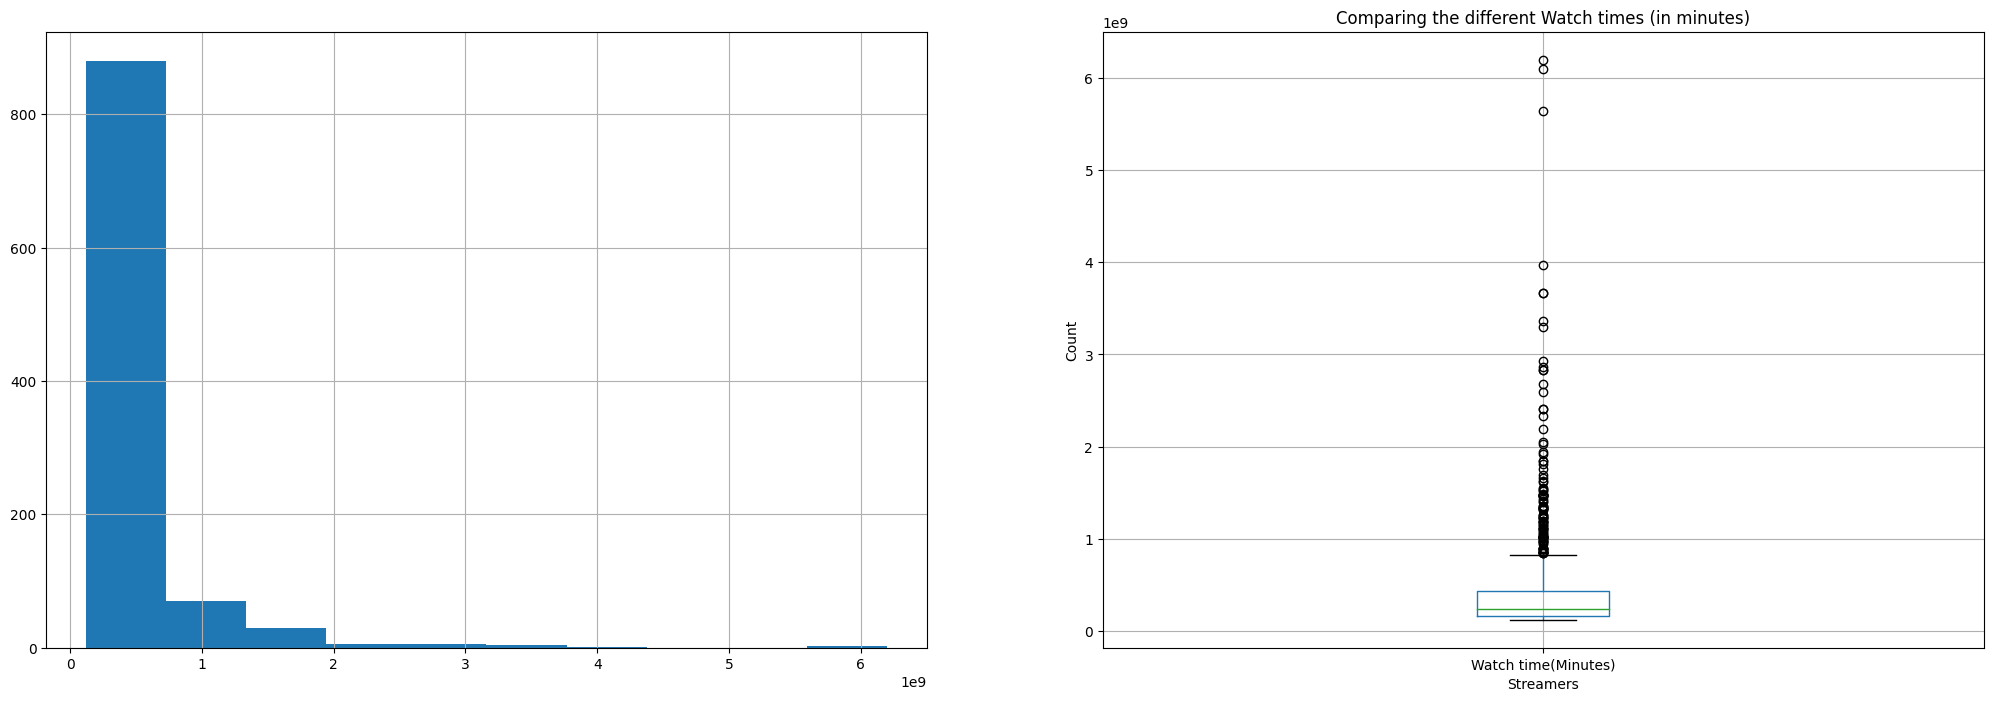

{'Min': 122192850, 'Max': 6196161750, 'Mean': 418427930.13, 'Median': 234990787.5}


In [12]:
# Below are the histograms of individual attributes wiht box plot for comparision.


fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Watch time(Minutes)'].hist(ax = ax1)
plt.title('Comparing the different Watch times (in minutes)')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Watch time(Minutes)']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Watch time(Minutes)'].min(),
    'Max' : td['Watch time(Minutes)'].max(), 
    'Mean' : td['Watch time(Minutes)'].mean(), 
    'Median' : td['Watch time(Minutes)'].median()
}

print(values)

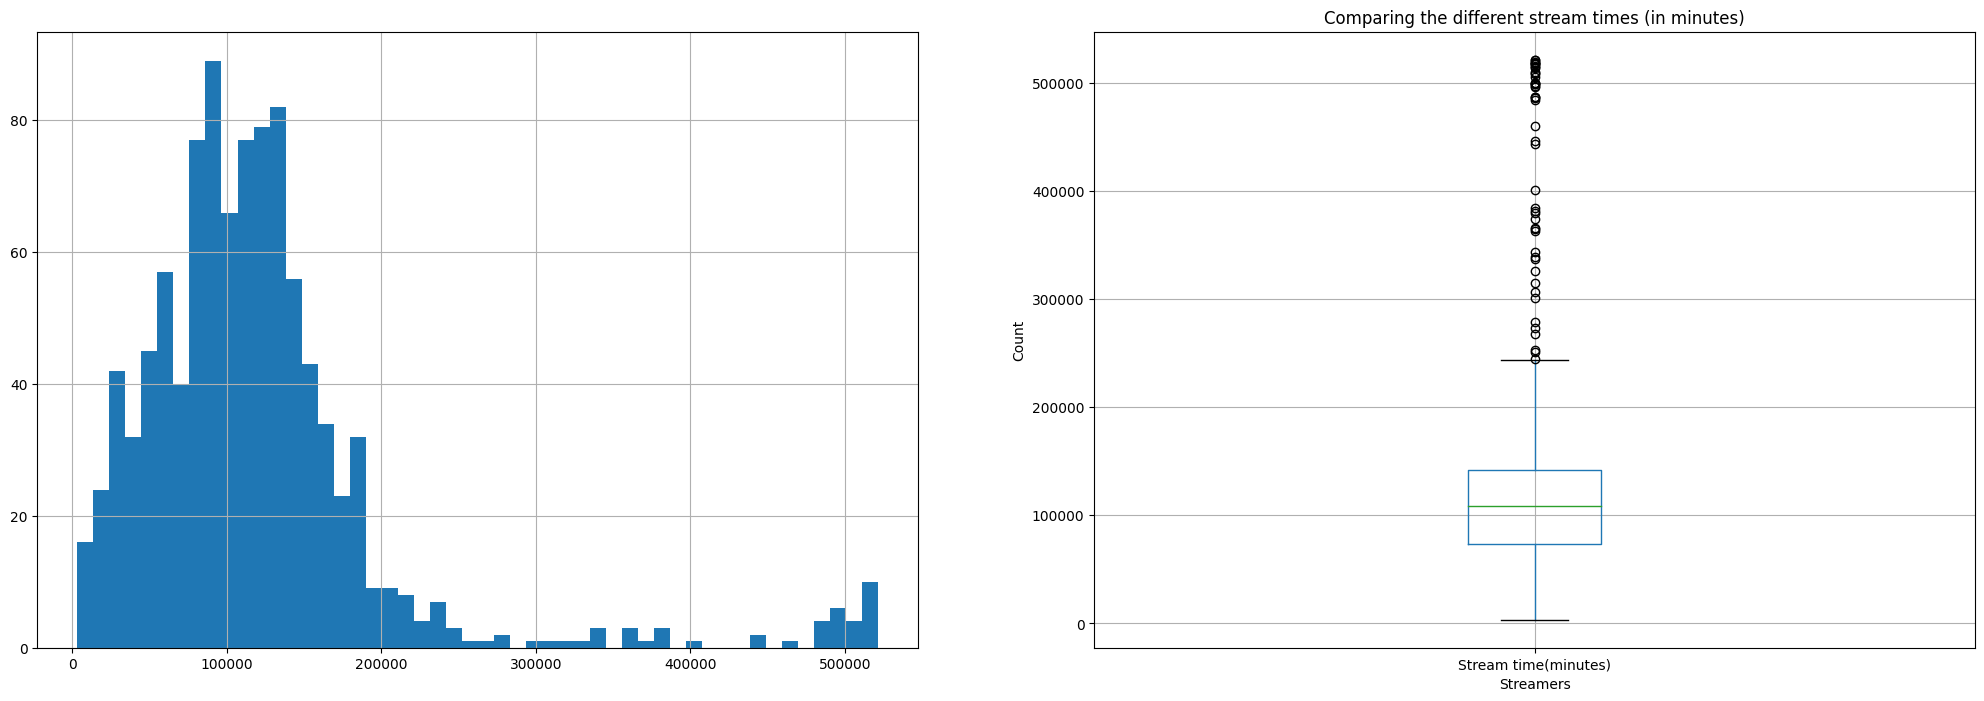

{'Min': 3465, 'Max': 521445, 'Mean': 120515.16, 'Median': 108240.0}


In [13]:
fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Stream time(minutes)'].hist(bins=50, ax=ax1)
plt.title('Comparing the different stream times (in minutes)')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Stream time(minutes)']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Stream time(minutes)'].min(),
    'Max' : td['Stream time(minutes)'].max(), 
    'Mean' : td['Stream time(minutes)'].mean(), 
    'Median' : td['Stream time(minutes)'].median()
}

print(values)

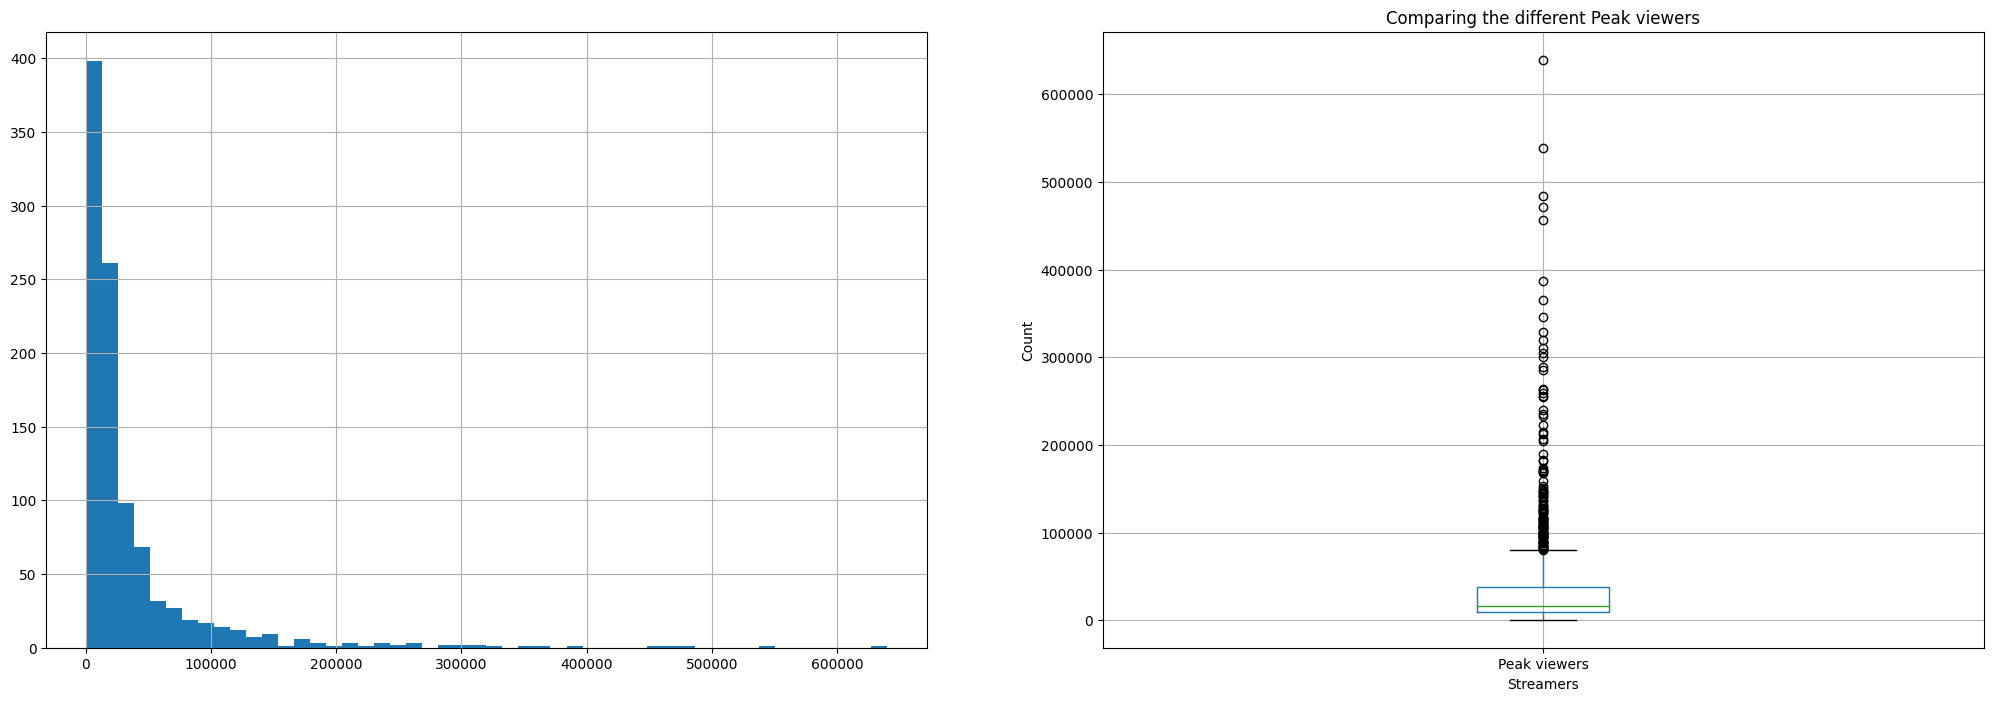

{'Min': 496, 'Max': 639375, 'Mean': 37065.051, 'Median': 16676.0}

In [14]:
fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Peak viewers'].hist(bins=50, ax=ax1)
plt.title('Comparing the different Peak viewers')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Peak viewers']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Peak viewers'].min(),
    'Max' : td['Peak viewers'].max(), 
    'Mean' : td['Peak viewers'].mean(), 
    'Median' : td['Peak viewers'].median()
}

values

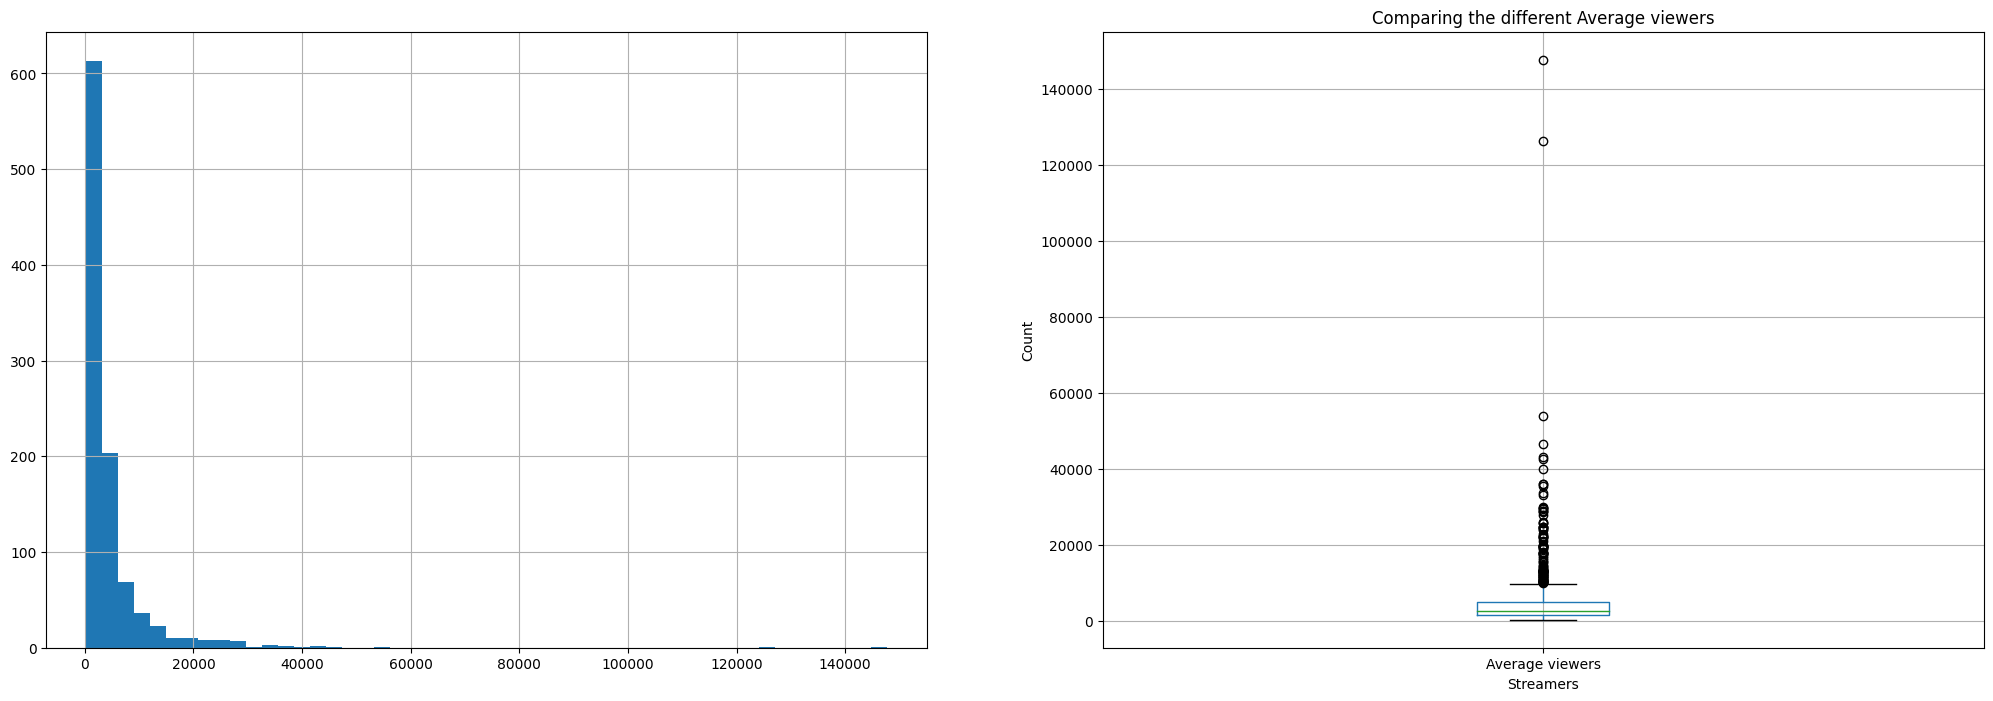

{'Min': 235, 'Max': 147643, 'Mean': 4781.04, 'Median': 2425.0}

In [15]:
fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Average viewers'].hist(bins=50,ax=ax1)
plt.title('Comparing the different Average viewers')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Average viewers']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Average viewers'].min(),
    'Max' : td['Average viewers'].max(), 
    'Mean' : td['Average viewers'].mean(), 
    'Median' : td['Average viewers'].median()
}

values

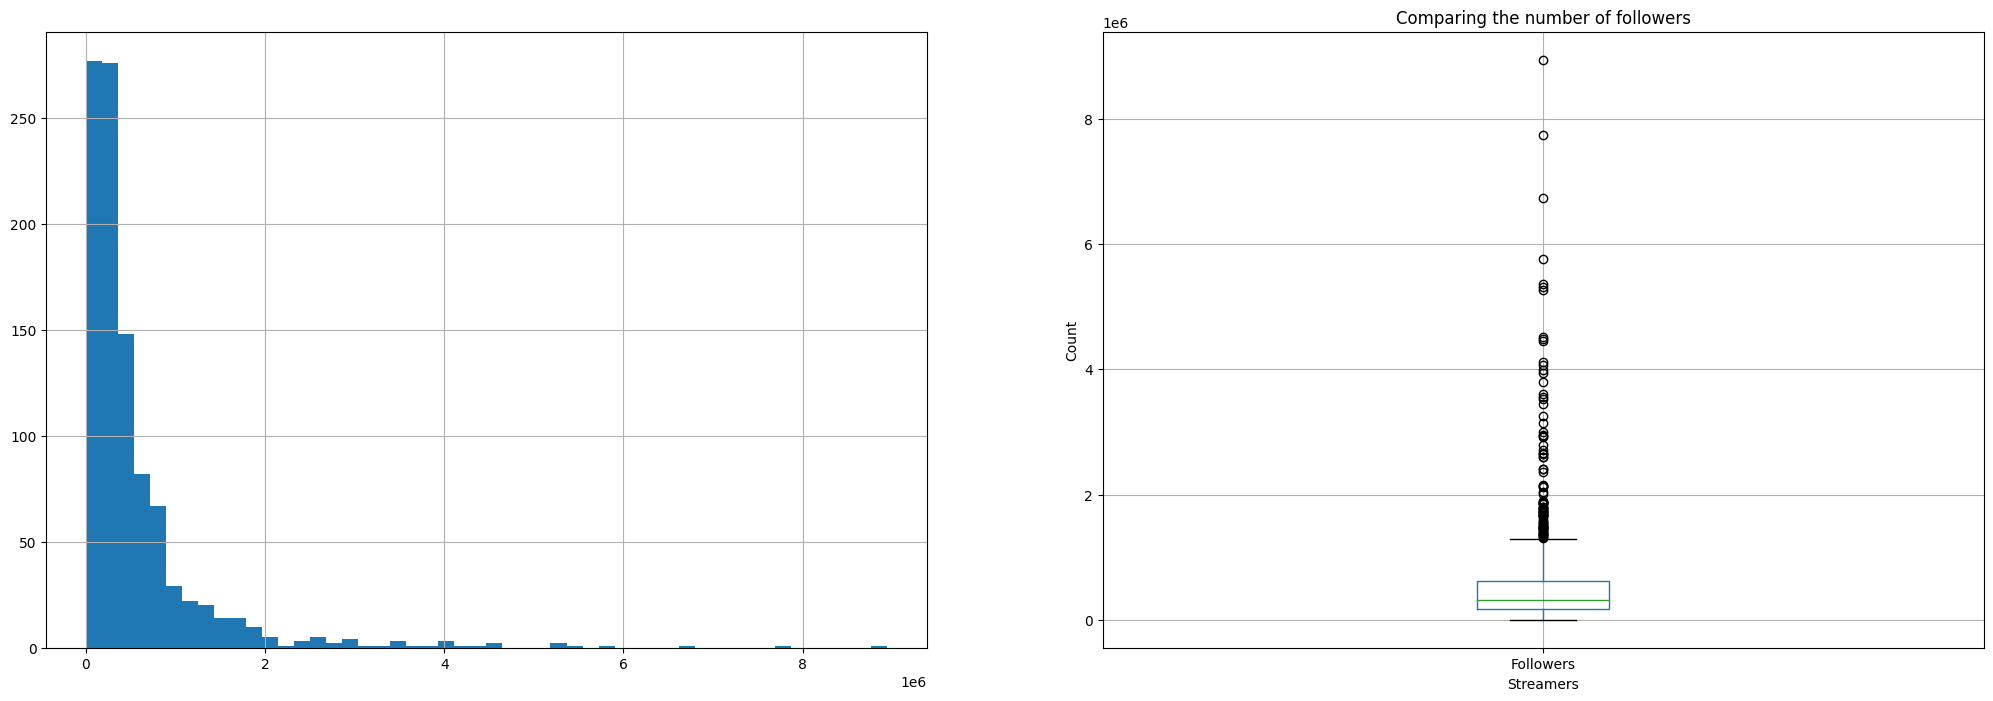

{'Min': 3660, 'Max': 8938903, 'Mean': 570054.068, 'Median': 318063.0}


In [16]:
fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Followers'].hist(bins=50,ax=ax1)
plt.title('Comparing the number of followers')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Followers']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Followers'].min(),
    'Max' : td['Followers'].max(), 
    'Mean' : td['Followers'].mean(), 
    'Median' : td['Followers'].median()
}

print(values)

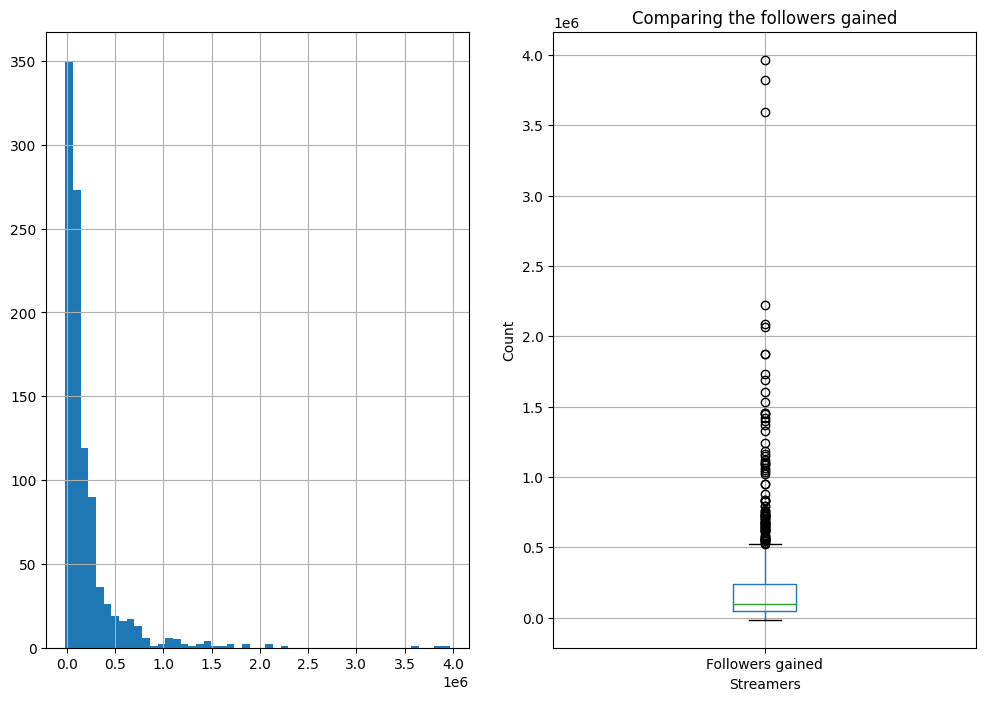

{'Min': -15772, 'Max': 3966525, 'Mean': 205518.534, 'Median': 98352.0}


In [17]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,8), ncols=2)
td['Followers gained'].hist(bins=50, ax=ax1)
plt.title('Comparing the followers gained')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Followers gained']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Followers gained'].min(),
    'Max' : td['Followers gained'].max(), 
    'Mean' : td['Followers gained'].mean(), 
    'Median' : td['Followers gained'].median()
}

print(values)

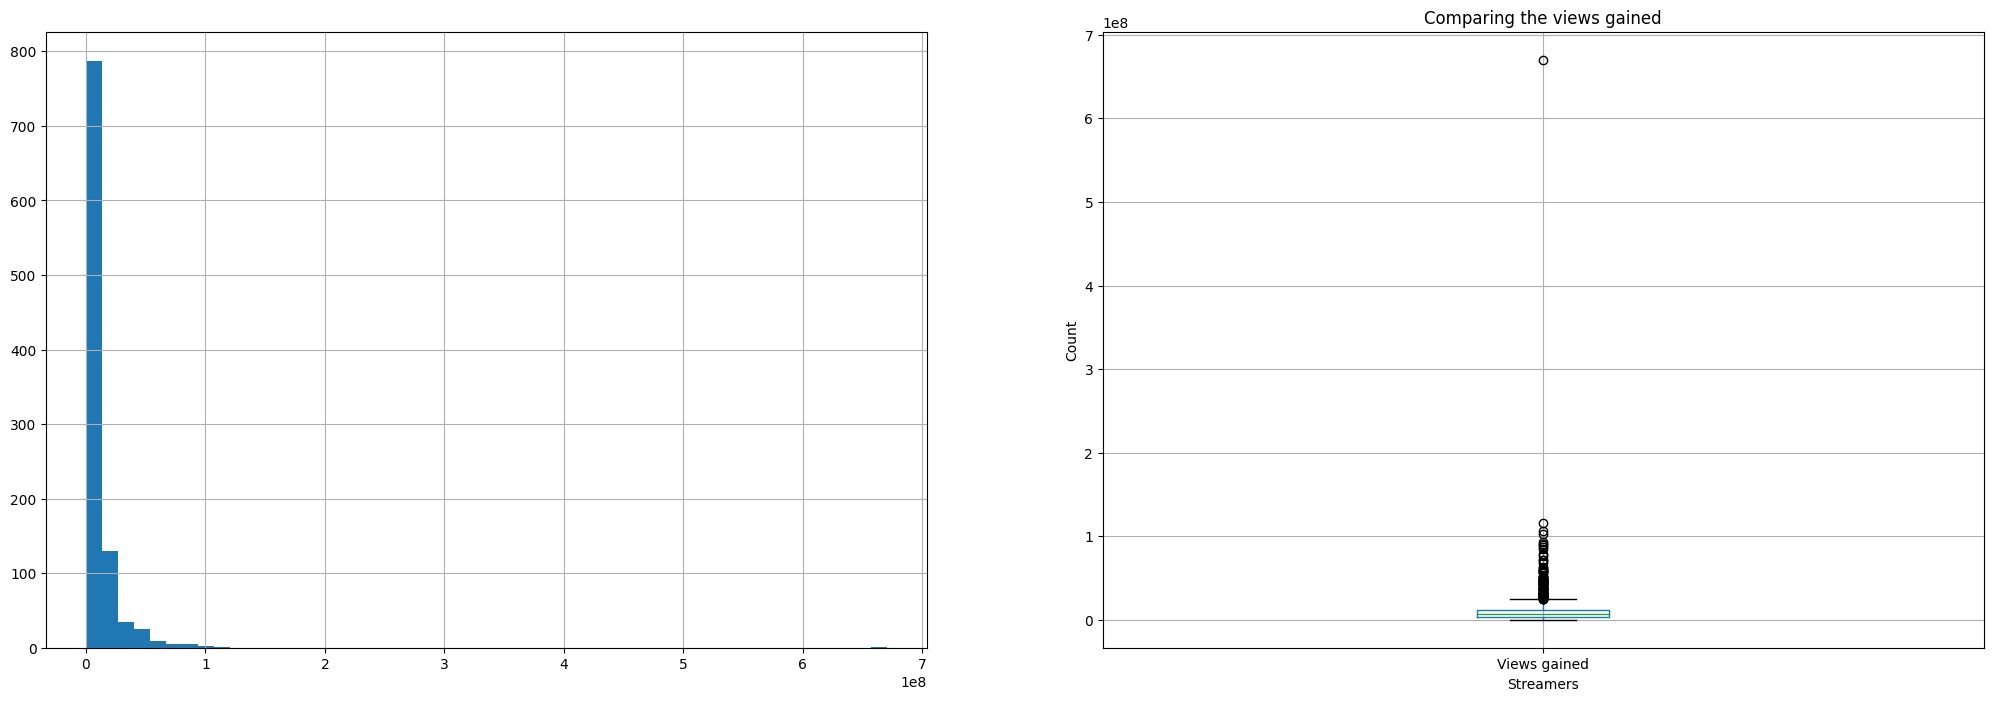

{'Min': 175788, 'Max': 670137548, 'Mean': 11668165.613, 'Median': 6456323.5}


In [18]:
fig,(ax1,ax2) = plt.subplots(figsize=(25,8), ncols=2)
td['Views gained'].hist(bins=50,ax=ax1)
plt.title('Comparing the views gained')
plt.xlabel('Streamers')
plt.ylabel('Count')
td[['Views gained']].boxplot(ax=ax2)
plt.show()

values = {
    "Min" : td['Views gained'].min(),
    'Max' : td['Views gained'].max(), 
    'Mean' : td['Views gained'].mean(), 
    'Median' : td['Views gained'].median()
}

print(values)

* this are the invidual histograms of the different variable of the data.

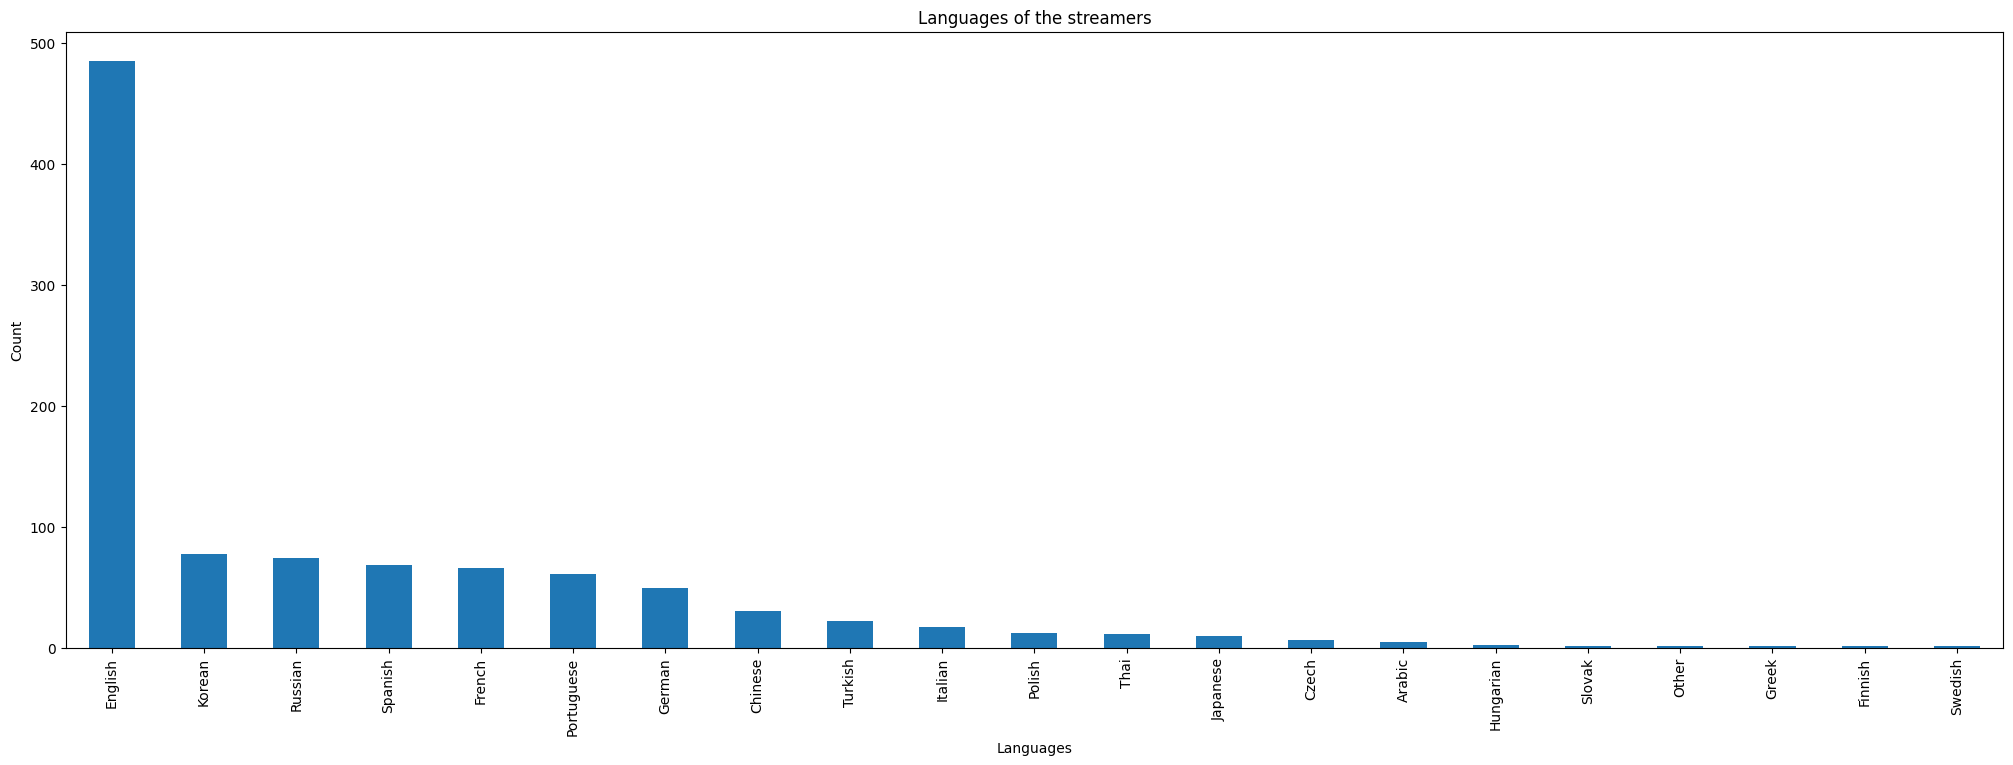

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Slovak          1
Other           1
Greek           1
Finnish         1
Swedish         1
Name: Language, dtype: int64

In [19]:

plt.figure(figsize = (25,8))
td['Language'].value_counts().plot.bar()
plt.title('Languages of the streamers')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

td['Language'].value_counts()

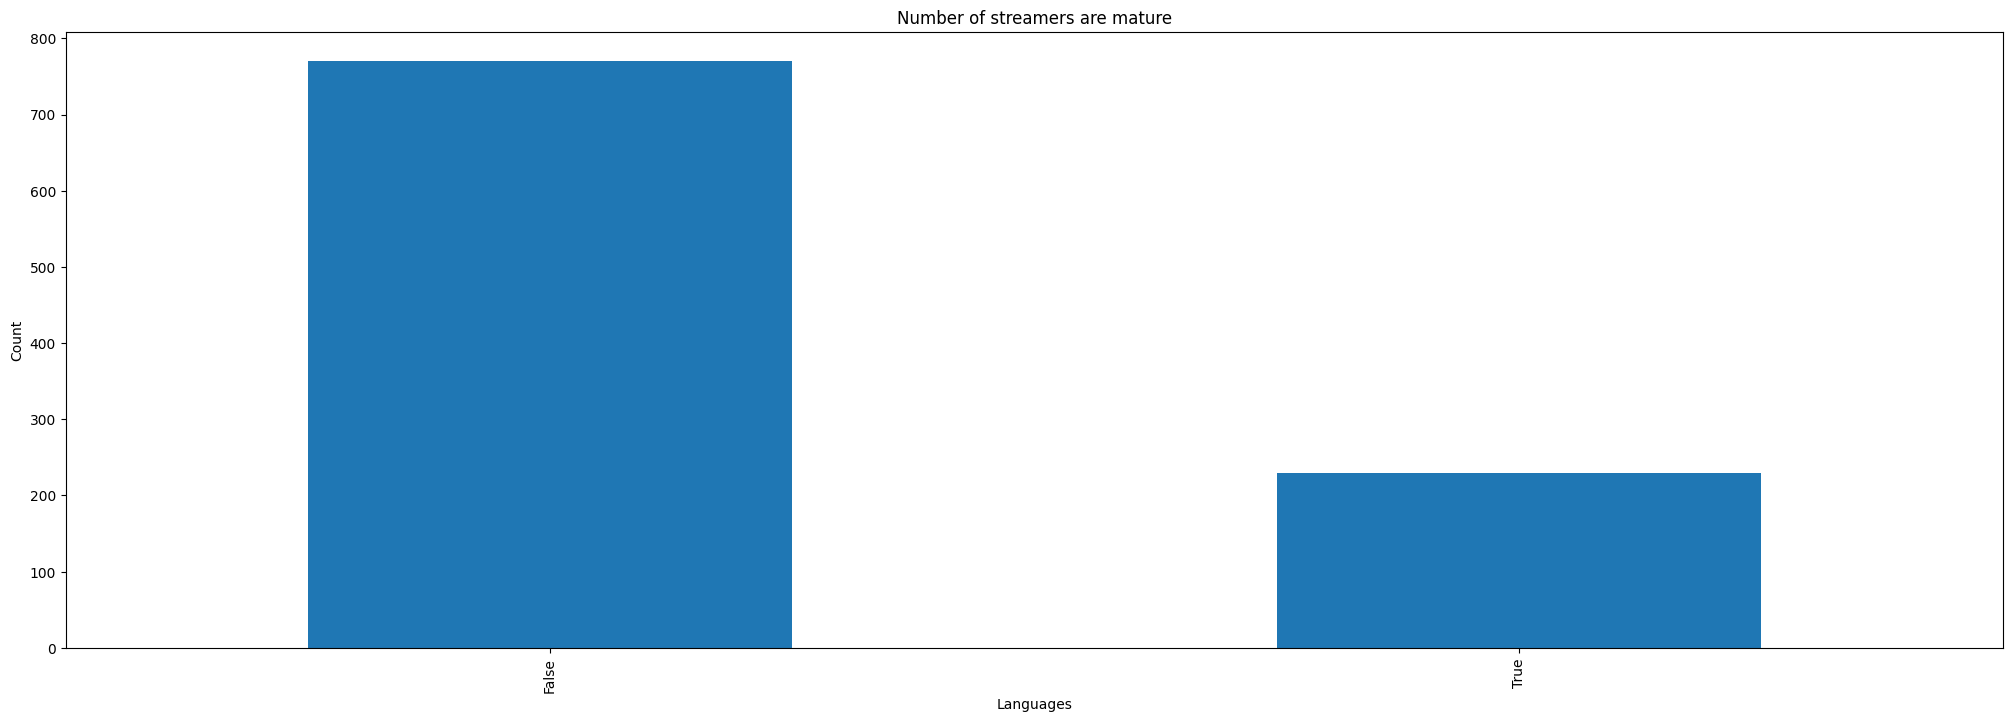

False    770
True     230
Name: Mature, dtype: int64


In [20]:
plt.figure(figsize = (25,8))
td['Mature'].value_counts().plot.bar()
plt.title('Number of streamers are mature')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

print(td['Mature'].value_counts())

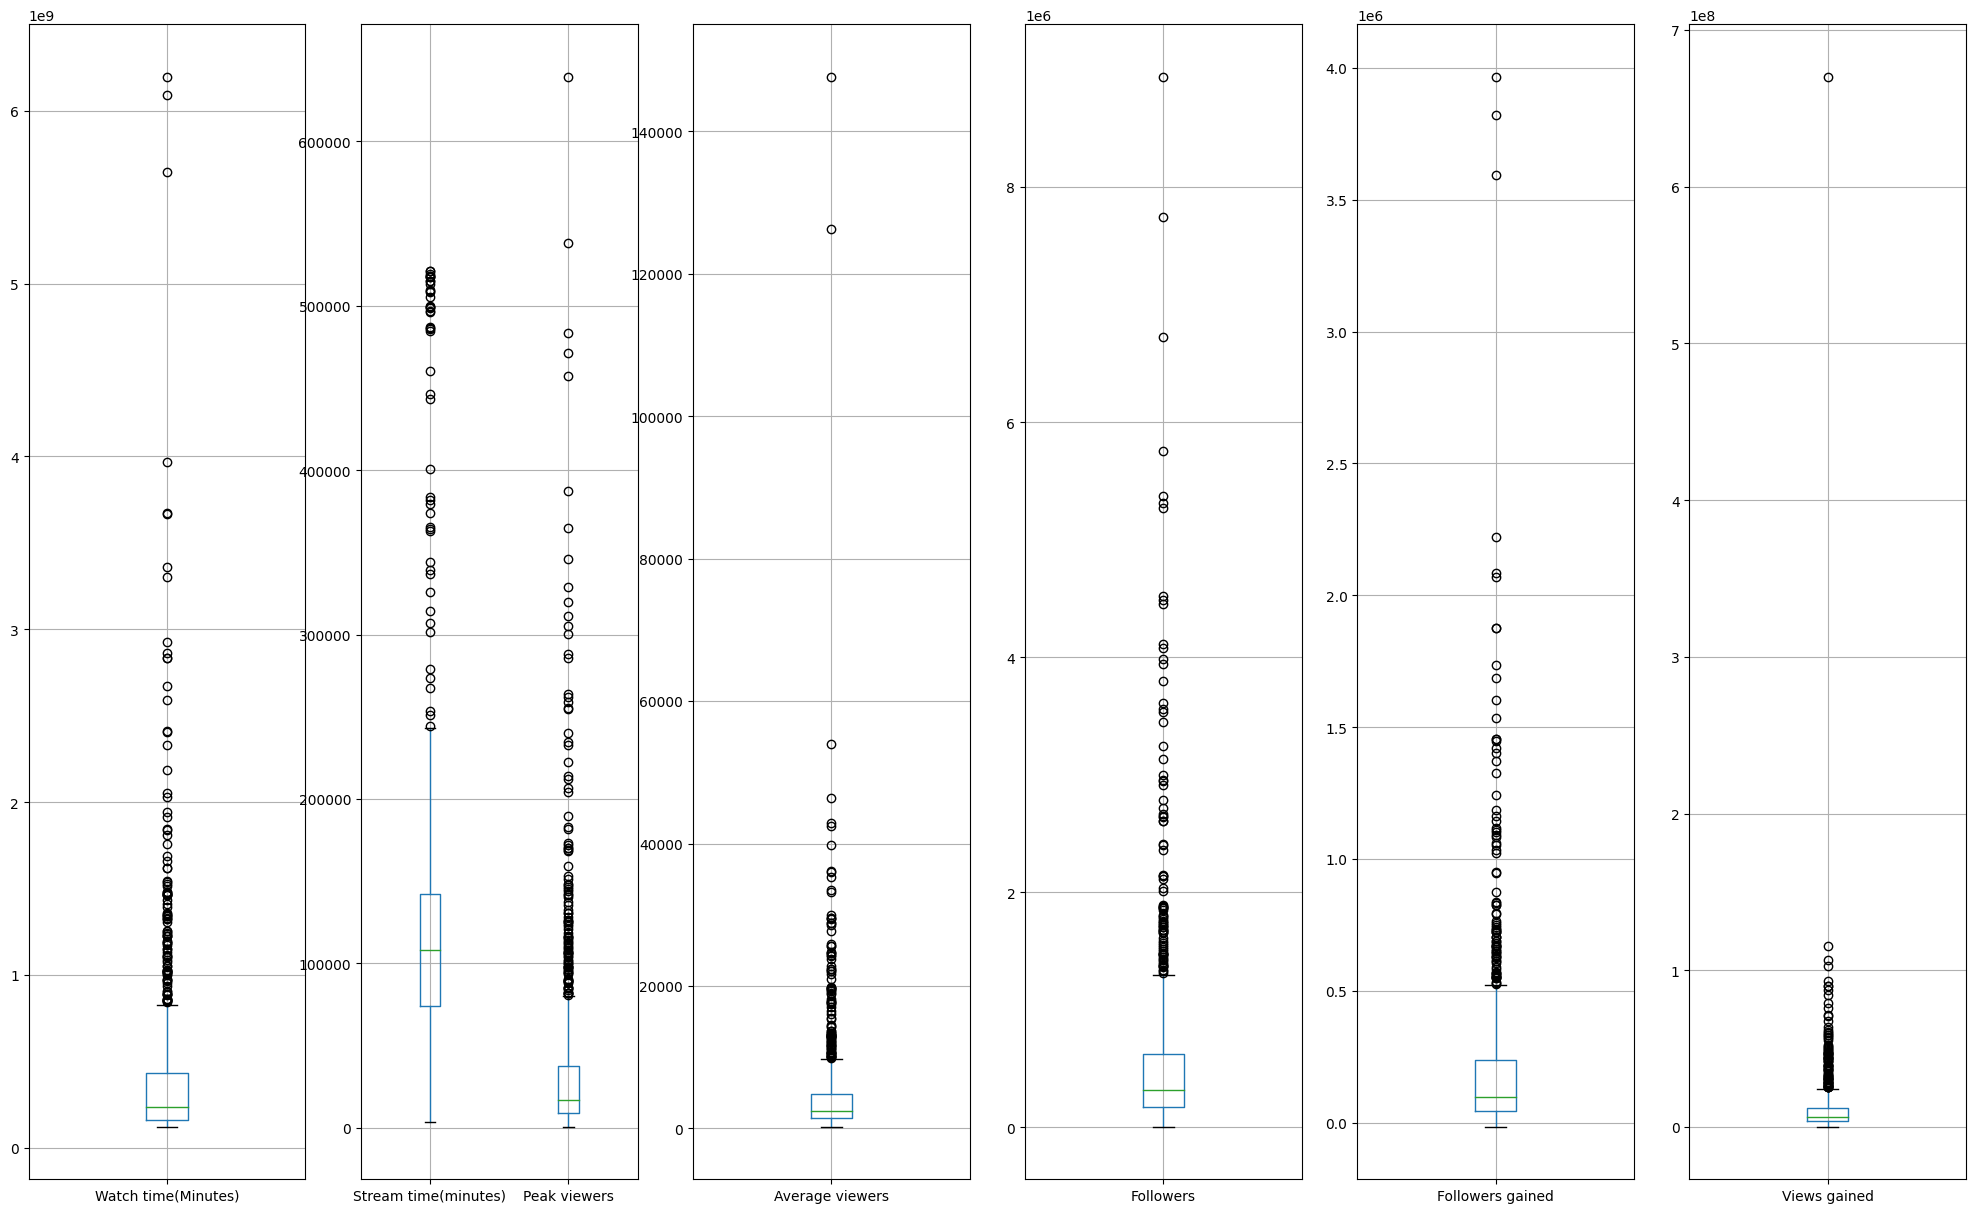

In [21]:
# this tab shows the combined box plot for all variables
# I has to create different subplots because the values were very far apart so the boxplot was getting squeezed.
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(figsize=(25,15), ncols=6)
_ = td[td.columns[1:2]].boxplot(ax=ax1)
_ = td[td.columns[2:4]].boxplot(ax=ax2)
_ = td[td.columns[4:5]].boxplot(ax=ax3)
_ = td[td.columns[5:6]].boxplot(ax=ax4)
_ = td[td.columns[6:7]].boxplot(ax=ax5)
_ = td[td.columns[7:8]].boxplot(ax=ax6)
plt.show()


In [22]:
td.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [23]:
td_numerical_data = td[['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
                        'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
                       'Views gained']]

td_categorical_data = td[['Channel', 'Partnered', 'Mature', 'Language']]

td_numerical_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587


In [24]:
td_categorical_data.head()

,Channel,Partnered,Mature,Language
0,xQcOW,True,False,English
1,summit1g,True,False,English
2,Gaules,True,True,Portuguese
3,ESL_CSGO,True,False,English
4,Tfue,True,False,English


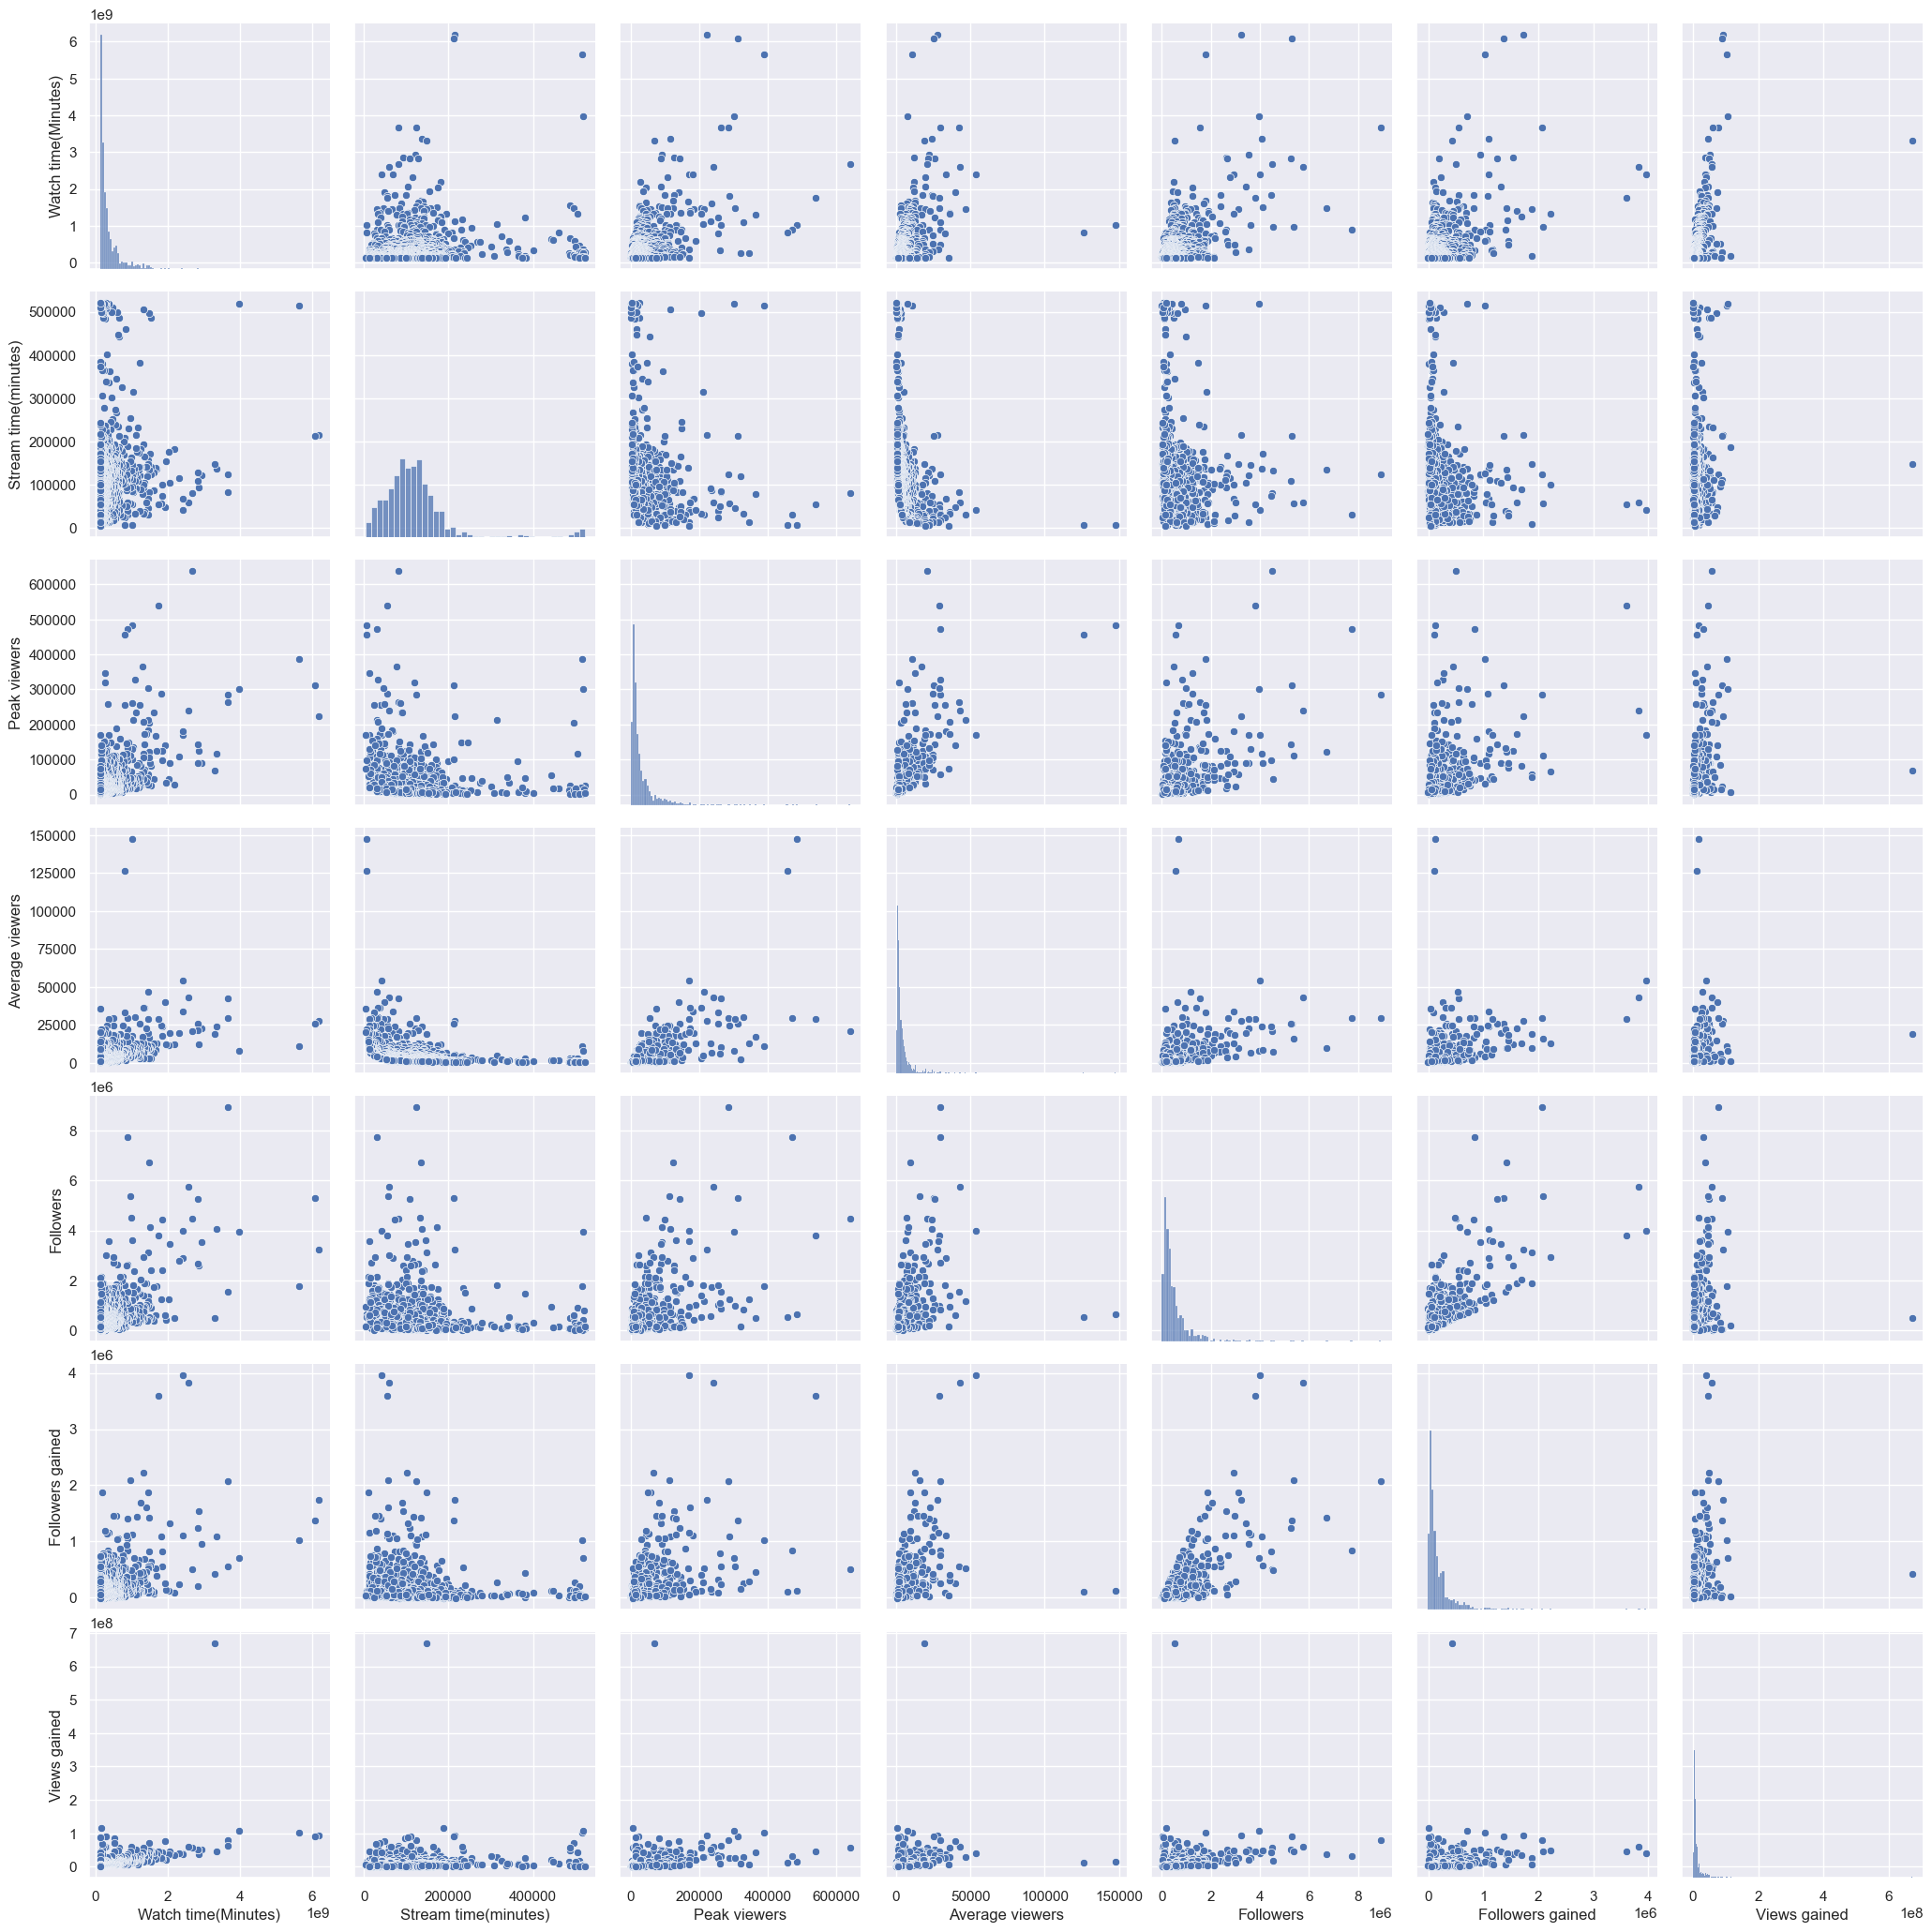

In [25]:
# pair-wise relationships with a matrix of scatter plots for the numerical data only

sns.set()
sns.pairplot(td_numerical_data, height = 3)
plt.show()

In [26]:
eng_streamers = td[td['Language'] == 'English'] # English Stremers
eng_streamers.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English


In [27]:
mat_eng_streamers = eng_streamers[eng_streamers['Mature'] == True] #Englsih Streamers who are mature.
mat_eng_streamers.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English
16,sodapoppin,2329440420,115305,107833,19659,2786162,236169,39334821,True,True,English
32,MOONMOON,1527882945,124680,24892,11220,923448,95776,13505898,True,True,English
42,ROSHTEIN,1435735725,118995,45843,11717,381918,242369,17836875,False,True,English
55,Gorgc,1252711830,141135,56449,8683,391726,136943,20882507,True,True,English


<AxesSubplot: >

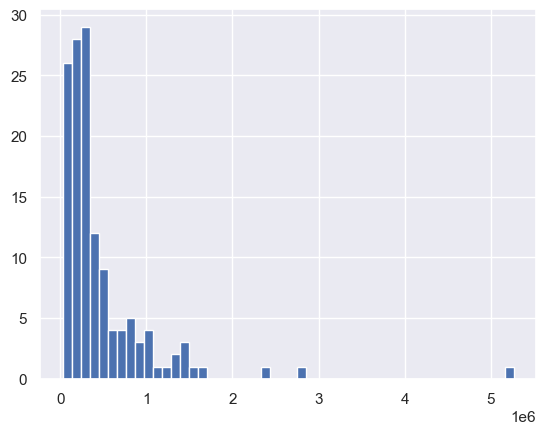

In [28]:
mat_eng_streamers['Followers'].hist(bins=50)
# mat_eng_streamers[['Stream time(minutes)']].boxplot()

<AxesSubplot: >

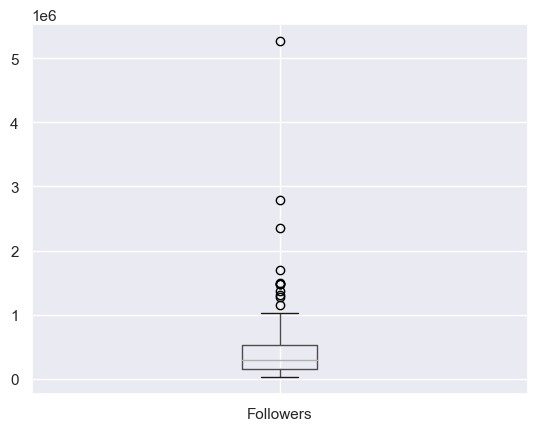

In [29]:
mat_eng_streamers[['Followers']].boxplot()

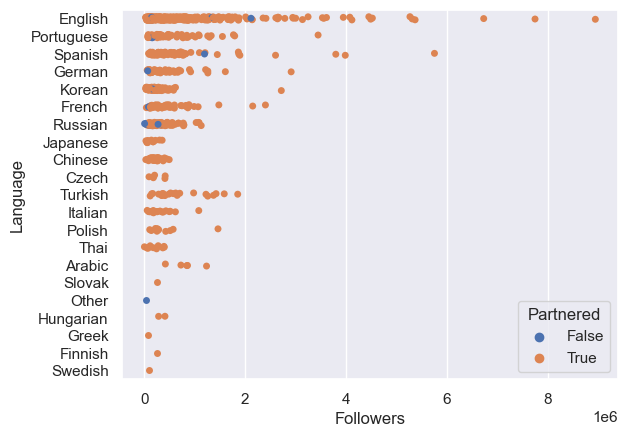

In [30]:
ax = sns.stripplot(data=td, x="Followers", y="Language", hue="Partnered")

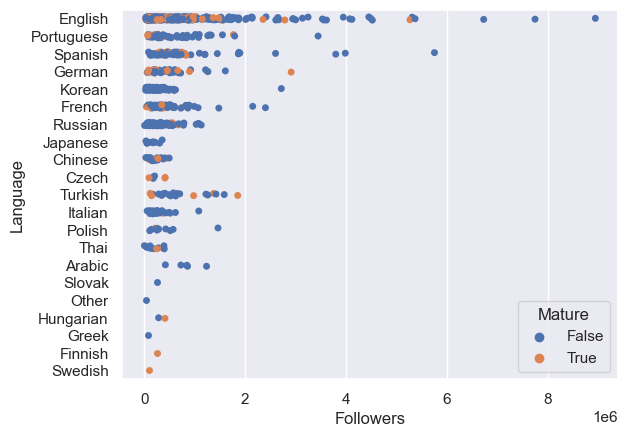

In [31]:
ax = sns.stripplot(data=td, x="Followers", y="Language", hue="Mature")

### Data Story
* From the above diagrams we can see that almost 50 percent of the streamers are english speaking streamers.
* 77 percent of the streamers are not mature.
* The second most popular language is Korean which is 7.7% of all the streamers.

